In [79]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Shape of training images:", train_images.shape)

Shape of training images: (60000, 28, 28)


In [80]:
from google.colab.patches import cv2_imshow
cv2_imshow(train_images[5])

In [81]:
# Model 1 - SoftMax Activation
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

# Model 2 - Leaky ReLu Activation
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(64, activation='leaky_relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(train_images, train_labels, epochs=6)

# Model 3 - Linear Activation
model3 = Sequential()
model3.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(64, activation='linear'))
model3.add(Dense(10, activation='softmax'))
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.fit(train_images, train_labels, epochs=6)

# Model 4 - TanH Activation
model4 = Sequential()
model4.add(Flatten(input_shape=(28, 28)))
model4.add(Dense(64, activation='tanh'))
model4.add(Dense(10, activation='softmax'))
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4.fit(train_images, train_labels, epochs=6)

# Model 5 - Relu Activation with Mean Squared Error Loss
model5 = Sequential()
model5.add(Flatten(input_shape=(28, 28)))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(10, activation='softmax'))
model5.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model5.fit(train_images, train_labels, epochs=6)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 10.0262 - accuracy: 0.8384
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1560 - accuracy: 0.8780
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.8601 - accuracy: 0.8817
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5593 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3979 - accuracy: 0.8877
Epoch 1/6
1875/1875 [==============================] - 5s 2ms/step - loss: 3.6448 - accuracy: 0.8710
Epoch 2/6
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6204 - accuracy: 0.9140
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2639 - accuracy: 0.9258
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9240 - accuracy: 0.9362
Epoch 5/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7605 - accura

In [82]:
model2.evaluate(test_images, test_labels)
model3.evaluate(test_images, test_labels)
model4.evaluate(test_images, test_labels)
model5.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 27.3403 - accuracy: 0.0958


[27.340312957763672, 0.0957999974489212]

Original shape:  (736, 736)
1/1 [==============================] - 0s 20ms/step
Predicted Label:  3


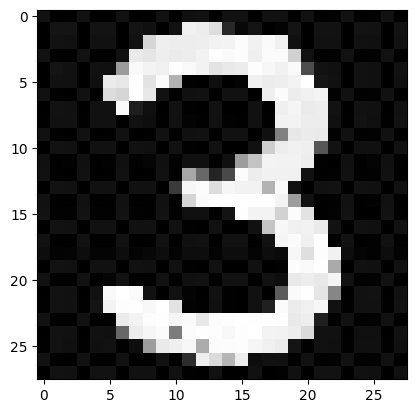

In [86]:
import cv2
photo="3.jpg"
test=cv2.imread(photo,cv2.IMREAD_GRAYSCALE)
plt.imshow(test, cmap='gray')
print('Original shape: ', test.shape)
resized_image = cv2.resize(test, dsize=(28, 28), interpolation=cv2.INTER_LINEAR)
inverted_image = cv2.bitwise_not(resized_image)
plt.imshow(inverted_image, cmap='gray')
predicted_label = model2.predict(np.expand_dims(inverted_image, axis=0))
print('Predicted Label: ', predicted_label.argmax())